In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv('../data/all_data.csv',index_col=0 )
df

,movie_id,primary_title,original_title,start_year,genres,average_rating,num_votes,persons_name,persons_job,title_norm_movie_info,...,production_budget,domestic_gross,worldwide_gross,title_norm_genre_long,genre,new_budget_api,new_ww_revenue_api,imdb_id,vote_average,vote_count
0,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Johnny Depp,actor,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Fantasy,200000000.00,1025467110.00,tt1014759,6.60,12255.00
1,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Johnny Depp,actor,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Family,200000000.00,1025467110.00,tt1014759,6.60,12255.00
2,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Johnny Depp,actor,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Adventure,200000000.00,1025467110.00,tt1014759,6.60,12255.00
3,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Helena Bonham Carter,actress,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Fantasy,200000000.00,1025467110.00,tt1014759,6.60,12255.00
4,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Helena Bonham Carter,actress,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Family,200000000.00,1025467110.00,tt1014759,6.60,12255.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34028,tt3829266,The Predator,The Predator,2018,"Action,Adventure,Sci-Fi",5.40,94888,Jacob Tremblay,actor,the predator 2018,...,88000000,51024708,159487563,the predator 2018,Sci-Fi,88000000.00,160542134.00,tt3829266,5.60,3786.00
34029,tt3829266,The Predator,The Predator,2018,"Action,Adventure,Sci-Fi",5.40,94888,Jacob Tremblay,actor,the predator 2018,...,88000000,51024708,159487563,the predator 2018,Adventure,88000000.00,160542134.00,tt3829266,5.60,3786.00
34030,tt3829266,The Predator,The Predator,2018,"Action,Adventure,Sci-Fi",5.40,94888,Trevante Rhodes,actor,the predator 2018,...,88000000,51024708,159487563,the predator 2018,Action,88000000.00,160542134.00,tt3829266,5.60,3786.00
34031,tt3829266,The Predator,The Predator,2018,"Action,Adventure,Sci-Fi",5.40,94888,Trevante Rhodes,actor,the predator 2018,...,88000000,51024708,159487563,the predator 2018,Sci-Fi,88000000.00,160542134.00,tt3829266,5.60,3786.00


In [3]:
df_genre_pb = df[['genre','new_budget_api']]
df_genre_pb

,genre,new_budget_api
0,Fantasy,200000000.00
1,Family,200000000.00
2,Adventure,200000000.00
3,Fantasy,200000000.00
4,Family,200000000.00
...,...,...
34028,Sci-Fi,88000000.00
34029,Adventure,88000000.00
34030,Action,88000000.00
34031,Sci-Fi,88000000.00


In [68]:
df_genre_pb_avg = df_genre_pb.groupby(by='genre').mean().reset_index()[['genre','new_budget_api']]
df_genre_pb_avg.sort_values(by='new_budget_api', ascending = True , inplace = True)

In [69]:
df_genre_pb_avg.new_budget_api

6      4071270.90
12    18298882.10
11    19387636.06
17    19449122.81
14    22244763.04
19    24132911.39
13    27799695.89
3     28680419.26
7     28853014.01
5     34492555.49
18    35540777.24
10    40242253.52
4     43741664.70
20    56254901.96
16    58285526.32
8     70922984.36
0     85521489.94
9     92418014.75
15    98276317.91
2    100296368.99
1    111531537.11
Name: new_budget_api, dtype: float64

In [70]:
df_genre_pb_avg.genre

6     Documentary
12          Music
11         Horror
17          Sport
14        Romance
19            War
13        Mystery
3       Biography
7           Drama
5           Crime
18       Thriller
10        History
4          Comedy
20        Western
16        Singing
8          Family
0          Action
9         Fantasy
15         Sci-Fi
2       Animation
1       Adventure
Name: genre, dtype: object

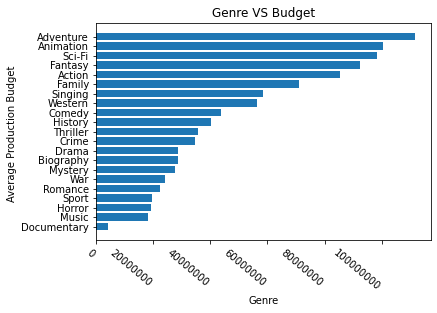

In [71]:
fig,ax = plt.subplots()
plt.xticks(rotation=320, ha="right")
ax.ticklabel_format(style='plain')



x = df_genre_pb_avg.genre
height = df_genre_pb_avg.new_budget_api

ax.barh(y = x , width = height, )
ax.set_xlabel('Genre')
ax.set_ylabel('Average Production Budget ')
ax.set_title('Genre VS Budget');

In [72]:
#According to the bar graph above, we can say that Action,Adventure,

In [73]:
df_genre_pb_median = df_genre_pb.groupby(by='genre').median().reset_index()[['genre','new_budget_api']]
df_genre_pb_median.sort_values(by='new_budget_api', ascending = True , inplace = True)

In [74]:
df_genre_pb_median.new_budget_api

6        50000.00
11    10000000.00
13    13500000.00
17    15000000.00
19    15000000.00
12    15000000.00
14    17000000.00
18    20000000.00
7     20000000.00
3     25000000.00
4     29000000.00
5     30000000.00
10    35000000.00
20    40000000.00
8     48000000.00
0     65000000.00
9     70000000.00
16    75000000.00
2     90000000.00
15    97000000.00
1    108000000.00
Name: new_budget_api, dtype: float64

In [75]:
df_genre_pb_median.genre

6     Documentary
11         Horror
13        Mystery
17          Sport
19            War
12          Music
14        Romance
18       Thriller
7           Drama
3       Biography
4          Comedy
5           Crime
10        History
20        Western
8          Family
0          Action
9         Fantasy
16        Singing
2       Animation
15         Sci-Fi
1       Adventure
Name: genre, dtype: object

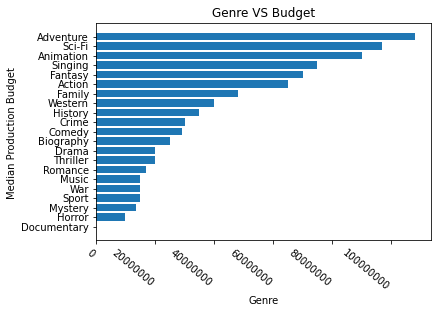

In [67]:
fig,ax = plt.subplots()
plt.xticks(rotation=320, ha="right")
ax.ticklabel_format(style='plain')



x = df_genre_pb_median.genre
height = df_genre_pb_median.new_budget_api

ax.barh(y = x , width = height, )
ax.set_xlabel('Genre')
ax.set_ylabel('Median Production Budget ')
ax.set_title('Genre VS Budget');